# Question1

### Step 1. Import the necessary libraries

In [99]:
import pandas as pd
import numpy as np

### Step 2. Import the dataset from this address. 

In [100]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user'

### Step 3. Assign it to a variable called users

In [101]:
users = pd.read_csv(url, sep='|')

### Step 4. Discover what is the mean age per occupation

In [154]:
age = users.groupby('occupation')['age'].mean()
print(age)

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64


### Step 5. Discover the Male ratio per occupation and sort it from the most to the least 

In [136]:
def ratio(x):
    male = sum(x == 'M')
    female = sum(x == 'F')
    return male/(male+female)

male_ratio = users.groupby('occupation')['gender'].apply(ratio)
male_ratio.sort_values(ascending=False, inplace=True)
print(male_ratio)

occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.657143
marketing        0.615385
writer           0.577778
none             0.555556
administrator    0.544304
artist           0.535714
librarian        0.431373
healthcare       0.312500
homemaker        0.142857
Name: gender, dtype: float64


### Step 6. For each occupation, calculate the minimum and maximum ages

In [137]:
minmax = users.groupby('occupation')['age'].agg(['min', 'max'])
print(minmax)

               min  max
occupation             
administrator   21   70
artist          19   48
doctor          28   64
educator        23   63
engineer        22   70
entertainment   15   50
executive       22   69
healthcare      22   62
homemaker       20   50
lawyer          21   53
librarian       23   69
marketing       24   55
none            11   55
other           13   64
programmer      20   63
retired         51   73
salesman        18   66
scientist       23   55
student          7   42
technician      21   55
writer          18   60


### Step 7. For each combination of occupation and sex, calculate the mean age

In [139]:
mean_age = users.groupby(['occupation', 'gender'])['age'].mean()
mean_age_data = mean_age.reset_index().pivot(index='occupation', columns='gender', values='age')
print(mean_age_data)

gender                 F          M
occupation                         
administrator  40.638889  37.162791
artist         30.307692  32.333333
doctor               NaN  43.571429
educator       39.115385  43.101449
engineer       29.500000  36.600000
entertainment  31.000000  29.000000
executive      44.000000  38.172414
healthcare     39.818182  45.400000
homemaker      34.166667  23.000000
lawyer         39.500000  36.200000
librarian      40.000000  40.000000
marketing      37.200000  37.875000
none           36.500000  18.600000
other          35.472222  34.028986
programmer     32.166667  33.216667
retired        70.000000  62.538462
salesman       27.000000  38.555556
scientist      28.333333  36.321429
student        20.750000  22.669118
technician     38.000000  32.961538
writer         37.631579  35.346154


### Step 8. For each occupation present the percentage of women and men

In [149]:
def percentages(x):
    male = sum(x == 'M')
    female = sum(x == 'F')
    total = male + female
    percent_male = male/total * 100
    percent_female = female/total * 100
    return pd.Series({'Male %': percent_male, 'Female %': percent_female})

gender_percentages = users.groupby('occupation')['gender'].apply(percentages)
print(gender_percentages)

occupation             
administrator  Male %       54.430380
               Female %     45.569620
artist         Male %       53.571429
               Female %     46.428571
doctor         Male %      100.000000
               Female %      0.000000
educator       Male %       72.631579
               Female %     27.368421
engineer       Male %       97.014925
               Female %      2.985075
entertainment  Male %       88.888889
               Female %     11.111111
executive      Male %       90.625000
               Female %      9.375000
healthcare     Male %       31.250000
               Female %     68.750000
homemaker      Male %       14.285714
               Female %     85.714286
lawyer         Male %       83.333333
               Female %     16.666667
librarian      Male %       43.137255
               Female %     56.862745
marketing      Male %       61.538462
               Female %     38.461538
none           Male %       55.555556
               Female %   

# Question 2

### Euro Teams
### Step 1. Import the necessary libraries


In [156]:
import pandas as pd
import numpy as np

### Step 2. Import the dataset from this address

In [157]:
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv'

### Step 3. Assign it to a variable called euro12

In [158]:
euro12 = pd.read_csv(url)

### Step 4. Select only the Goal column

In [167]:
goals = euro12['Goals'].values
print('Goals:' , goals)

Goals: [ 4  4  4  5  3 10  5  6  2  2  6  1  5 12  5  2]


### Step 5. How many team participated in the Euro2012?

In [161]:
team_total = euro12['Team'].count()
print('Number of team participated:',team_total)

Number of team participated: 16


### Step 6. What is the number of columns in the dataset?

In [162]:
columns = euro12.shape[1]
print('Number of columns in dataset are ',columns)

Number of columns in dataset are  35


### Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline

In [163]:
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']].set_index('Team', drop=True)
print(discipline)

                     Yellow Cards  Red Cards
Team                                        
Croatia                         9          0
Czech Republic                  7          0
Denmark                         4          0
England                         5          0
France                          6          0
Germany                         4          0
Greece                          9          1
Italy                          16          0
Netherlands                     5          0
Poland                          7          1
Portugal                       12          0
Republic of Ireland             6          1
Russia                          6          0
Spain                          11          0
Sweden                          7          0
Ukraine                         5          0


### Step 8. Sort the teams by Red Cards, then to Yellow Cards

In [170]:
discipline_sorted = discipline.sort_values(['Red Cards', 'Yellow Cards'], ascending=False)
print(discipline_sorted)

                     Yellow Cards  Red Cards
Team                                        
Greece                          9          1
Poland                          7          1
Republic of Ireland             6          1
Italy                          16          0
Portugal                       12          0
Spain                          11          0
Croatia                         9          0
Czech Republic                  7          0
Sweden                          7          0
France                          6          0
Russia                          6          0
England                         5          0
Netherlands                     5          0
Ukraine                         5          0
Denmark                         4          0
Germany                         4          0


### Step 9. Calculate the mean Yellow Cards given per Team

In [173]:
mean_yellowcards = euro12['Yellow Cards'].mean()
print('Mean Yellow card given per team :',mean_yellowcards)

Mean Yellow card given per team : 7.4375


### Step 10. Filter teams that scored more than 6 goals

In [178]:
filtered_teams = euro12[euro12['Goals'] > 6]['Team'].values
print('Teams that scored more than 6 goals:',filtered_teams)

Teams that scored more than 6 goals: ['Germany' 'Spain']


### Step 11. Select the teams that start with G

In [181]:
teams_with_g = euro12[euro12['Team'].str.startswith('G')]['Team'].values
print('teams that start with G:',teams_with_g)

teams that start with G: ['Germany' 'Greece']


### Step 12. Select the first 7 columns

In [190]:
first7 = euro12.iloc[:, :7]
print(first7)

                   Team  Goals  Shots on target  Shots off target  \
0               Croatia      4               13                12   
1        Czech Republic      4               13                18   
2               Denmark      4               10                10   
3               England      5               11                18   
4                France      3               22                24   
5               Germany     10               32                32   
6                Greece      5                8                18   
7                 Italy      6               34                45   
8           Netherlands      2               12                36   
9                Poland      2               15                23   
10             Portugal      6               22                42   
11  Republic of Ireland      1                7                12   
12               Russia      5                9                31   
13                Spain     12    

### Step 13. Select all columns except the last 3

In [191]:
last_3_cols_drop = euro12.iloc[:, :-3]
print(last_3_cols_drop)

                   Team  Goals  Shots on target  Shots off target  \
0               Croatia      4               13                12   
1        Czech Republic      4               13                18   
2               Denmark      4               10                10   
3               England      5               11                18   
4                France      3               22                24   
5               Germany     10               32                32   
6                Greece      5                8                18   
7                 Italy      6               34                45   
8           Netherlands      2               12                36   
9                Poland      2               15                23   
10             Portugal      6               22                42   
11  Republic of Ireland      1                7                12   
12               Russia      5                9                31   
13                Spain     12    

### Step 14. Present only the Shooting Accuracy from England, Italy and Russia

In [200]:
shooting_acc = euro12.loc[euro12['Team'].isin(['England', 'Italy', 'Russia']), ['Team', 'Shooting Accuracy']].set_index('Team', drop=True)
print('the Shooting Accuracy:')
print(shooting_acc)

the Shooting Accuracy:
        Shooting Accuracy
Team                     
England             50.0%
Italy               43.0%
Russia              22.5%


# Question 3

### Housing
### Step 1. Import the necessary libraries

In [201]:
import pandas as pd
import numpy as np

### Step 2. Create 3 differents Series, each of length 100, as follows:
#### • The first a random number from 1 to 40
#### • The second a random number from 1 to 3
#### • The third a random number from 10,000 to 30,000

In [202]:
s1 = pd.Series(np.random.randint(1, 41, size=100))
s2 = pd.Series(np.random.randint(1, 4, size=100))
s3 = pd.Series(np.random.randint(10000, 30001, size=100))


### Step 3. Create a DataFrame by joining the Series by column

In [208]:
dataframe = pd.concat([s1, s2, s3], axis=1)
print('DATAFRAME:')
print(dataframe)

DATAFRAME:
     0  1      2
0   10  3  15538
1   31  2  11065
2   34  2  13360
3   18  1  21377
4   32  3  10276
..  .. ..    ...
95  10  1  27976
96   4  2  12776
97  15  1  16379
98   1  2  23666
99  24  1  21282

[100 rows x 3 columns]


### Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter

In [211]:
dataframe.columns = ['bedrs', 'bathrs', 'price_sqr_meter']
print(dataframe)

    bedrs  bathrs  price_sqr_meter
0      10       3            15538
1      31       2            11065
2      34       2            13360
3      18       1            21377
4      32       3            10276
..    ...     ...              ...
95     10       1            27976
96      4       2            12776
97     15       1            16379
98      1       2            23666
99     24       1            21282

[100 rows x 3 columns]


### Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'

In [217]:
bigcolumn = pd.concat([s1, s2, s3], axis=0)
bigcolumn =pd.DataFrame(bigcolumn, columns=['bigcolumn'])
print(bigcolumn)

    bigcolumn
0          10
1          31
2          34
3          18
4          32
..        ...
95      27976
96      12776
97      16379
98      23666
99      21282

[300 rows x 1 columns]


### Step 6. Ops it seems it is going only until index 99. Is it true?

Certainly, this is true. Each of the original Series had a length of 100, therefore the concatenated Series intended to have been 300 in total. The index values from the original Series are kept when the Series is concatenated using axis=0, however. This means that the concatenated series' index values range from 0 to 99, then from 0 to 99 again, and lastly from 0 to 99. The ultimate index value is 99.

### Step 7. Reindex the DataFrame so it goes from 0 to 299

In [219]:
print('Reindexed data:')
bigcolumn = bigcolumn.reset_index(drop=True)
bigcolumn.index.name = 'index'
print(bigcolumn)

Reindexed data:
       bigcolumn
index           
0             10
1             31
2             34
3             18
4             32
...          ...
295        27976
296        12776
297        16379
298        23666
299        21282

[300 rows x 1 columns]


# Question 4

### Step 1. Import the necessary libraries

In [284]:
import pandas as pd
import numpy as np
import datetime

### Step 2. Import the dataset from the attached file wind.txt
### Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index.

In [285]:
data = pd.read_csv('wind.txt', delimiter = "\s+", parse_dates=[[0,1,2]])

In [286]:
data = data.set_index('Yr_Mo_Dy')

### Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it.

In [287]:
def acc_year(x):
    if x.year > 2021:
        year = x.year - 100
    else:
        year = x.year
    return pd.datetime(year, x.month, x.day)

data.index = data.index.map(acc_year)

C:\Users\patel\AppData\Local\Temp\ipykernel_1920\3831443199.py:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  return pd.datetime(year, x.month, x.day)


 ### Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64.
 

In [288]:
data.index = pd.to_datetime(data.index)

### Step 6. Compute how many values are missing for each location over the entire record. They should be ignored in all calculations below.

In [289]:
print('Number of missing values for each location:')
missing_val = data.isnull().sum()
print(missing_values)

Number of missing values for each location:
RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64


### Step 7. Compute how many non-missing values there are in total.

In [290]:
nonmissing_val = np.sum(data.notnull().sum())
print('Number of non-missing values:',nonmissing_val)

Number of non-missing values: 78857


### Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times. A single number for the entire dataset.

In [291]:
mean_windspeed = data.mean().mean()
print('The mean windspeeds of the windspeeds over all the locations and all the times:' , mean_windspeed)

The mean windspeeds of the windspeeds over all the locations and all the times: 10.227982360836924


### Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days. A different set of numbers for each location.

In [292]:
loc_stats = pd.DataFrame()
loc_stats['min'] = data.min()
loc_stats['max'] = data.max()
loc_stats['mean'] = data.mean()
loc_stats['std'] = data.std()

print(loc_stats)

      min    max       mean       std
RPT  0.67  35.80  12.362987  5.618413
VAL  0.21  33.37  10.644314  5.267356
ROS  1.50  33.84  11.660526  5.008450
KIL  0.00  28.46   6.306468  3.605811
SHA  0.13  37.54  10.455834  4.936125
BIR  0.00  26.16   7.092254  3.968683
DUB  0.00  30.37   9.797343  4.977555
CLA  0.00  31.08   8.495053  4.499449
MUL  0.00  25.88   8.493590  4.166872
CLO  0.04  28.21   8.707332  4.503954
BEL  0.13  42.38  13.121007  5.835037
MAL  0.67  42.54  15.599079  6.699794


### Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day. A different set of numbers for each day.

In [293]:
day_stats = pd.DataFrame()
day_stats['min'] = data.min(axis=1)
day_stats['max'] = data.max(axis=1)
day_stats['mean'] = data.mean(axis=1)
day_stats['std'] = data.std(axis=1)
print(day_stats)

             min    max       mean       std
Yr_Mo_Dy                                    
1961-01-01  9.29  18.50  13.018182  2.808875
1961-01-02  6.50  17.54  11.336364  3.188994
1961-01-03  6.17  18.50  11.641818  3.681912
1961-01-04  1.79  11.75   6.619167  3.198126
1961-01-05  6.17  13.33  10.630000  2.445356
...          ...    ...        ...       ...
1978-12-27  8.08  40.08  16.708333  7.868076
1978-12-28  5.00  41.46  15.150000  9.687857
1978-12-29  8.71  29.58  14.890000  5.756836
1978-12-30  9.13  28.79  15.367500  5.540437
1978-12-31  9.59  27.29  15.402500  5.702483

[6574 rows x 4 columns]


### Step 11. Find the average windspeed in January for each location. Treat January 1961 and January 1962 both as January.

In [294]:
jan_data = data[data.index.month == 1]
jan_mean = jan_data.mean()
print('The average windspeed in January for each location:')
print(jan_mean)

The average windspeed in January for each location:
RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64


### Step 12. Downsample the record to a yearly frequency for each location.

In [295]:
yearly=data.groupby(data.index.to_period('Y')).mean()
print(yearly)

                RPT        VAL        ROS       KIL        SHA       BIR  \
Yr_Mo_Dy                                                                   
1961      12.299583  10.351796  11.362369  6.958227  10.881763  7.729726   
1962      12.246923  10.110438  11.732712  6.960440  10.657918  7.393068   
1963      12.813452  10.836986  12.541151  7.330055  11.724110  8.434712   
1964      12.363661  10.920164  12.104372  6.787787  11.454481  7.570874   
1965      12.451370  11.075534  11.848767  6.858466  11.024795  7.478110   
1966      13.461973  11.557205  12.020630  7.345726  11.805041  7.793671   
1967      12.737151  10.990986  11.739397  7.143425  11.630740  7.368164   
1968      11.835628  10.468197  11.409754  6.477678  10.760765  6.067322   
1969      11.166356   9.723699  10.902000  5.767973   9.873918  6.189973   
1970      12.600329  10.726932  11.730247  6.217178  10.567370  7.609452   
1971      11.273123   9.095178  11.088329  5.241507   9.440329  6.097151   
1972      12

### Step 13. Downsample the record to a monthly frequency for each location.

In [296]:
monthly=data.groupby(data.index.to_period('M')).mean()
print(monthly)

                RPT        VAL        ROS       KIL        SHA        BIR  \
Yr_Mo_Dy                                                                    
1961-01   14.841333  11.988333  13.431613  7.736774  11.072759   8.588065   
1961-02   16.269286  14.975357  14.441481  9.230741  13.852143  10.937500   
1961-03   10.890000  11.296452  10.752903  7.284000  10.509355   8.866774   
1961-04   10.722667   9.427667   9.998000  5.830667   8.435000   6.495000   
1961-05    9.860968   8.850000  10.818065  5.905333   9.490323   6.574839   
...             ...        ...        ...       ...        ...        ...   
1978-08    9.645161   8.259355   9.032258  4.502903   7.368065   5.935161   
1978-09   10.913667  10.895000  10.635000  5.725000  10.372000   9.278333   
1978-10    9.897742   8.670968   9.295806  4.721290   8.525161   6.774194   
1978-11   16.151667  14.802667  13.508000  7.317333  11.475000   8.743000   
1978-12   16.175484  13.748065  15.635161  7.094839  11.398710   9.241613   

### Step 14. Downsample the record to a weekly frequency for each location.

In [297]:
weekly=data.groupby(data.index.to_period('W')).mean()
print(weekly)

                             RPT        VAL        ROS        KIL        SHA  \
Yr_Mo_Dy                                                                       
1960-12-26/1961-01-01  15.040000  14.960000  13.170000   9.290000        NaN   
1961-01-02/1961-01-08  13.541429  11.486667  10.487143   6.417143   9.474286   
1961-01-09/1961-01-15  12.468571   8.967143  11.958571   4.630000   7.351429   
1961-01-16/1961-01-22  13.204286   9.862857  12.982857   6.328571   8.966667   
1961-01-23/1961-01-29  19.880000  16.141429  18.225714  12.720000  17.432857   
...                          ...        ...        ...        ...        ...   
1978-11-27/1978-12-03  14.934286  11.232857  13.941429   5.565714  10.215714   
1978-12-04/1978-12-10  20.740000  19.190000  17.034286   9.777143  15.287143   
1978-12-11/1978-12-17  16.758571  14.692857  14.987143   6.917143  11.397143   
1978-12-18/1978-12-24  11.155714   8.008571  13.172857   4.004286   7.825714   
1978-12-25/1978-12-31  14.951429  11.801

### Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on B January 2 1961) for the first 52 weeks.

In [298]:
weekly_data = data.resample('W').first().iloc[:52]
weekly_stats = weekly_data.agg(['min', 'max', 'mean', 'std'], axis=1)
print(weekly_stats)

              min    max       mean       std
Yr_Mo_Dy                                     
1961-01-01   9.29  18.50  13.018182  2.808875
1961-01-08   6.50  17.54  11.798333  3.436009
1961-01-15   4.75  15.37   9.897500  2.905954
1961-01-22   4.71  16.42  10.164167  3.521277
1961-01-29   9.96  20.58  14.034167  3.208592
1961-02-05   7.92  19.25  12.490833  3.513766
1961-02-12  14.46  26.38  20.315833  3.735898
1961-02-19  13.96  28.62  18.060833  4.261164
1961-02-26   7.25  15.09  10.205000  2.225417
1961-03-05   6.87  20.00  12.420000  3.543481
1961-03-12   2.83  10.21   5.607500  2.095797
1961-03-19   5.63  19.70  12.556667  3.780725
1961-03-26  10.04  21.09  13.082500  3.101126
1961-04-02   1.46  15.34   5.667500  3.616455
1961-04-09   4.12  15.67   9.170000  3.624312
1961-04-16   3.00  11.25   5.850000  2.276053
1961-04-23   0.83  10.04   3.946667  2.508184
1961-04-30   4.79   9.87   7.422500  1.691907
1961-05-07   9.75  18.63  12.663333  2.975599
1961-05-14  10.08  26.30  15.85666

# Question 5

### Step 1. Import the necessary libraries

In [19]:
import pandas as pd
import numpy as np

### Step 2. Import the dataset from this address.

In [20]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'

### Step 3. Assign it to a variable called chipo.

In [21]:
chipo = pd.read_csv(url, sep='\t')

### Step 4. See the first 10 entries

In [34]:
print('FIRST 10 ENRIES:')
chipo.head(10)

FIRST 10 ENRIES:


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. What is the number of observations in the dataset?

In [113]:
print('TOTAL NUMBER OF OBSERVATION:',chipo.shape[0])  

TOTAL NUMBER OF OBSERVATION: 4622


### Step 6. What is the number of columns in the dataset?

In [112]:
print('TOTAL NUMBER OF COLUMNS:',chipo.shape[1]) 

TOTAL NUMBER OF COLUMNS: 5


### Step 7. Print the name of all the columns.

In [111]:
print('NAME OF THE COLUMNS ARE:',chipo.columns.values)  

NAME OF THE COLUMNS ARE: ['order_id' 'quantity' 'item_name' 'choice_description' 'item_price']


### Step 8. How is the dataset indexed?

In [110]:
print('DATASET INDEX:',chipo.index)

DATASET INDEX: RangeIndex(start=0, stop=4622, step=1)


### Step 9. Which was the most-ordered item?

In [116]:
count = chipo.groupby('item_name')['quantity'].sum()
print('THE MOST ORDERED ITEM IS:')
print(count.sort_values(ascending=False).head(1).index[0])

THE MOST ORDERED ITEM IS:
Chicken Bowl


### Step 10. For the most-ordered item, how many items were ordered?

In [75]:
print('THE COUNT OF MOST ORDERED ITEM IS:')
count = chipo.groupby('item_name')['quantity'].sum()
print(count.sort_values(ascending=False).head(1).values[0])

THE COUNT OF MOST ORDERED ITEM IS:
761


### Step 11. What was the most ordered item in the choice_description column?

In [46]:
print('THE MOST ORDERED ITEM IN CHOICE DESCRIPTION COLUMN IS:')
choice_count = chipo.groupby('choice_description')['quantity'].sum()
print(choice_count.sort_values(ascending=False).head(1).index[0])

THE MOST ORDERED ITEM IN CHOICE DESCRIPTION COLUMN IS:
[Diet Coke]


### Step 12. How many items were ordered in total?

In [76]:
print('TOTAL ORDERED ITEMS ARE:')
totalorder = chipo['quantity'].sum()
print(totalorder)   

TOTAL ORDERED ITEMS ARE:
4972


### Step 13.
#### • Turn the item price into a float
#### • Check the item price type
#### • Create a lambda function and change the type of item price
#### • Check the item price type

In [73]:
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x))
print(chipo['item_price'].dtype)
chipo['item_price'] = chipo['item_price'].apply(lambda x: int(x))
print(chipo['item_price'].dtype)

float64
int64


### Step 14. How much was the revenue for the period in the dataset?

In [69]:
print('REVENUE FOR THE PERIOD:')
revenue = (chipo['quantity'] * chipo['item_price']).sum()
print(round(revenue, 2))

REVENUE FOR THE PERIOD:
36616


### Step 15. How many orders were made in the period?

In [70]:
print('TOTAL NUMBER OF ORDER DURING THE PERIOD:')
total= chipo['order_id'].nunique()
print(total) 

TOTAL NUMBER OF ORDER DURING THE PERIOD:
1834


### Step 16. What is the average revenue amount per order?

In [71]:
print('AVERAGE REVENUE AMOUNT PER ORDER:')
average = revenue/total_orders
print(round(average, 2)) 

AVERAGE REVENUE AMOUNT PER ORDER:
19.97


### Step 17. How many different items are sold?

In [300]:
print('NUMBER OF DIFFERENT ITEM SOLD:')
num_items = chipo['item_name'].nunique()
print(num_items)

NUMBER OF DIFFERENT ITEM SOLD:
50


# Question 6

### Create a line plot showing the number of marriages and divorces per capita in the U.S. between 1867 and 2014. Label both lines and show the legend.

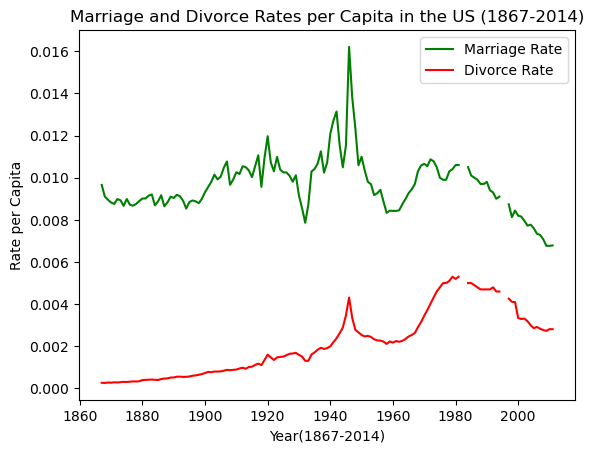

In [80]:
import pandas as pd
import matplotlib.pyplot as plt

marriage_divorce_ratio = pd.read_csv('us-marriages-divorces-1867-2014.csv')

marriage_divorce_ratio['Marriage Rate'] = marriage_divorce_ratio['Marriages']/marriage_divorce_ratio['Population']
marriage_divorce_ratio['Divorce Rate'] = marriage_divorce_ratio['Divorces']/marriage_divorce_ratio['Population']

plt.plot(marriage_divorce_ratio['Year'], marriage_divorce_ratio['Marriage Rate'], label='Marriage Rate',color='green')
plt.plot(marriage_divorce_ratio['Year'], marriage_divorce_ratio['Divorce Rate'], label='Divorce Rate',color='red')

plt.title('Marriage and Divorce Rates per Capita in the US (1867-2014)')
plt.xlabel('Year(1867-2014)')
plt.ylabel('Rate per Capita')

plt.legend()

plt.show()

# Question 7

### Create a vertical bar chart comparing the number of marriages and divorces per capita in the U.S. between 1900, 1950, and 2000. 

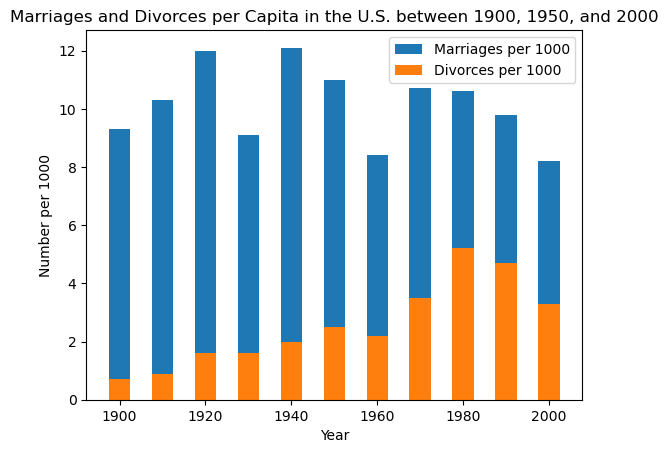

In [109]:
import pandas as pd
import matplotlib.pyplot as plt

marriage_divorce_ratio = pd.read_csv('us-marriages-divorces-1867-2014.csv')

years = [1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000]
marriages_per_1000 = []
divorces_per_1000 = []

for year in years:
    data = marriage_divorce_ratio.loc[marriage_divorce_ratio['Year'] == year]
    marriages_per_1000.append(data['Marriages_per_1000'].values[0])
    divorces_per_1000.append(data['Divorces_per_1000'].values[0])

plt.bar(years, marriages_per_1000, width=5, label='Marriages per 1000')
plt.bar(years, divorces_per_1000, width=5, label='Divorces per 1000')
plt.xlabel('Year')
plt.ylabel('Number per 1000')
plt.title('Marriages and Divorces per Capita in the U.S. between 1900, 1950, and 2000')
plt.legend()
plt.show()

# Question 8

### Create a horizontal bar chart that compares the deadliest actors in Hollywood. 

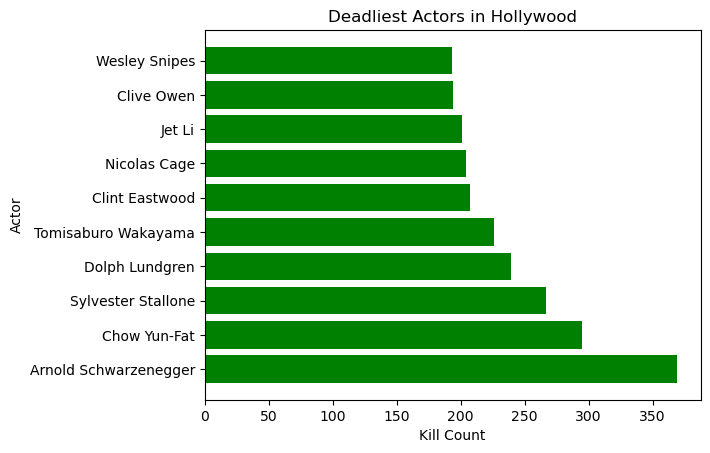

In [90]:
import pandas as pd
import matplotlib.pyplot as plt


actor = pd.read_csv('actor_kill_counts.csv')

actor = actor.sort_values(by='Count', ascending=False)

plt.barh(actor['Actor'], actor['Count'], color='green')
plt.xlabel('Kill Count')
plt.ylabel('Actor')
plt.title('Deadliest Actors in Hollywood')
plt.show()


# Question 9

### Create a pie chart showing the fraction of all Roman Emperors that were assassinated.

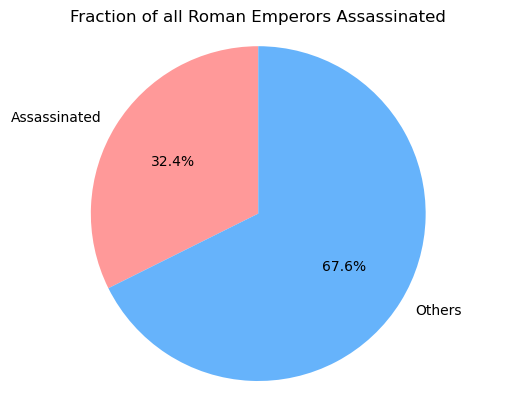

In [96]:
import pandas as pd
import matplotlib.pyplot as plt

emperors = pd.read_csv('roman-emperor-reigns.csv')

count_ass = (emperors['Cause_of_Death'] == 'Assassinated').sum()
count_other = len(emperors) - assassinated_count
assassinated_percent = assassinated_count / len(emperors) * 100
other_percent = 100 - assassinated_percent

labels = ['Assassinated', 'Others']
sizes = [assassinated_percent, other_percent]
colors = ['#ff9999','#66b3fb']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Fraction of all Roman Emperors Assassinated')
plt.show()


# Question 10


### Create a scatter plot showing the relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009.


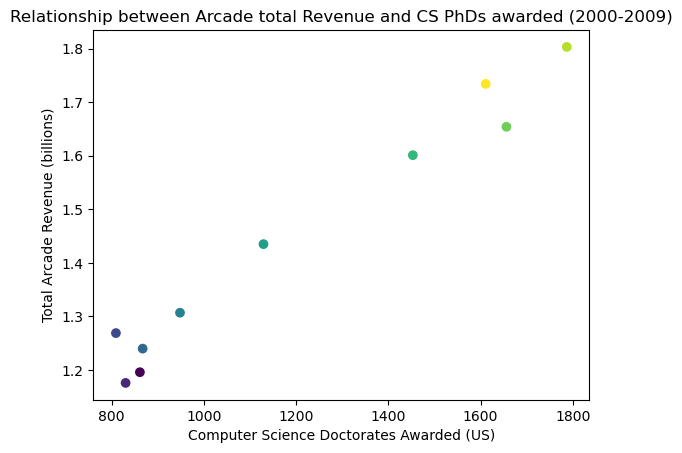

In [97]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')

x = data['Computer Science Doctorates Awarded (US)']
y = data['Total Arcade Revenue (billions)']
colors = data['Year']

plt.scatter(x, y, c=colors, cmap='viridis')
plt.xlabel('Computer Science Doctorates Awarded (US)')
plt.ylabel('Total Arcade Revenue (billions)')
plt.title('Relationship between Arcade total Revenue and CS PhDs awarded (2000-2009)')
plt.show()
